
# 🗓Section 20-22: Hypothesis A/B Testing

In [1]:
pwd

'/Users/jamesirving/Documents/GitHub/_STUDY GROUP PREP/fsds_pt_100719_cohort_notes/Instructor Notebooks'

- online-ds-pt-100719
- 01/21/20



# Topics / Question 
 

- T-Test Assumptions
- Parametric vs Non-Parametric Tests
- ANOVAs
- Hands-On Hypothesis Testing

- Mod 3 Project

## Resources
**Overivews/Cheatsheets**
- [CodeAcademy Hypothesis Testing Slideshow](https://drive.google.com/open?id=1p4R2KCErq_iUO-wnfDrGPukTgQDBNoc7)
- [Cheatsheet: Hypothesis Testing with Scipy](https://drive.google.com/open?id=1EY4UCg20HawWlWa50M2tFauoKBQcFFAW)


- [Choosing Between Parametric and Non-Parametric Tests](https://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test)

**Trustable Stat References**:
- [Graphpad Prism's Stat Guide](https://www.graphpad.com/guides/prism/8/statistics/index.htm)
- [LAERD Statistics Test Selector](https://statistics.laerd.com/premium/sts/index.php)


## T-Test & ANOVA Assumptions


### Assumptions for performing t-tests 

When performing various kinds of t-tests, you assume:
- that the sample observations have numeric and continuous values. 
- the sample observations are independent from each other (that is, that you have a simple random sample)
- **and that the samples have been drawn from normal distributions.**
- **samples of homogeneity of variance**


In the case of unpaired two-sample t-tests, you also assume that the populations the samples have been drawn from have the same variance. 
For paired two-sample t-tests, you assume that the _difference_ between the two sets of samples are normally distributed.  


#### Regardless of the type of t-test you are performing, there are 5 main steps to executing them:

1) Set up null and alternative hypotheses

2) Choose a significance level 

3) Calculate the test statistic

4) Determine the critical or p-value (find the rejection region)

5) Compare t-value with critical t-value to accept or reject the Null hypothesis.


# Choosing the Correct Hypothesis Test

| What type of comparison? | Numeric Data | Categorical Data|
| --- | --- | --- |
|Sample vs Known Quantity/Target|1 Sample T-Test| Binomial Test|
|2 Samples | 2 Sample T-Test| Chi-Square|
|More than 2| ANOVA and/or Tukey | Chi Square|

### Parametric  T-Tests vs Non-Parametric Alternatives 
- [Choosing Between Parametric and Non-Parametric Tests](https://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test)

#### When can we ignore the assumption of normality? 
- When our group N's are sufficiently large. 

| Parametric analyses| Sample size guidelines for nonnormal data| 
| --- | --- |
| 1-sample t test| Greater than 20|
| 2-sample t test| Each group should be greater than 15| 
| One-Way ANOVA|If have 2-9 groups, each group n >= 15. <br>If have 10-12 groups, each group n>20.|


### Non-Parametric Alternatives

| Parametric tests (means) | Nonparametric tests (medians) |
 | --- | --- |
 | 1-sample t test | 1-sample Wilcoxon |
 | 2-sample t test | Mann-Whitney U test |
 | One-Way ANOVA | Kruskal-Wallis |
 | Factorial DOE with one factor and one blocking variable |Friedman test  |


#  **Stating our Hypothesis:**

> **What question are you attempting to answer?**


- $H_1$ : State the expected relationship between the variables.

- $H_0$ : State the null hypothesis regarding the lack of relationship between the variables. 

<br>

## HYPOTHESIS TESTING STEPS

- Separate data in group vars.
- Visualize data and calculate group n (size)

    
* Select the appropriate test based on type of comparison being made, the number of groups, the type of data.


- For t-tests: test for the assumptions of normality and homogeneity of variance.

    1. Check if sample sizes allow us to ignore assumptions, and if not:
    2. **Test Assumption Normality**

    3. **Test for Homogeneity of Variance**

    4. **Choose appropriate test based upon the above** 
    
    
* **Aim 3: Perform chosen statistical test, calculate effect size, and any post-hoc tests.**
    - To perform post-hoc pairwise comparison testing
    - Effect size calculation
        - Cohen's d

## Statistical Analysis Pipeline

1. **Test for Normality**
    - D'Agostino-Pearson's normality test<br>
    ```scipy.stats.normaltest```
    - Shapiro-Wilik Test<br>
    ```scipy.stats.shapiro```<br>
    
    
2. **Test for Homogeneity of Variance**

    - Levene's Test<br>
    ```scipy.stats.levene```


3. **Choose appropriate test based upon 1. and 2.** <br> 
    - T Test (1-sample)
        - `stats.ttest_1samp()`
    - T Test (2-sample)
        - `stats.ttest_ind()`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
    - Welch's T-Test (2-sample)
        - `stats.ttest_ind(equal_var=False)`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
        
    - Mann Whitney U
        - `stats.mannwhitneyu()`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)
    - ANOVA 
        - `stats.f_oneway()`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)
    - Tukey's
     - `statsmodels.stats.multicomp.pairwise_tukeyhsd`
     -[docs](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)
    
    
4. **Calculate effect size for significant results.**
    - Effect size: [cohen's d](https://stackoverflow.com/questions/21532471/how-to-calculate-cohens-d-in-python)
    - Interpretation:
        - Small effect = 0.2 ( cannot be seen by naked eye)
        - Medium effect  = 0.5
        - Large Effect = 0.8 (can be seen by naked eye)
        
5. **If significant, follow up with post-hoc tests (if have more than 2 groups)**
    - [Tukey's](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)


In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.6.5 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [2]:
#### Cohen's d
def Cohen_d(group1, group2):
    # Compute Cohen's d.
    # group1: Series or NumPy array
    # group2: Series or NumPy array
    # returns a floating point number 
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [3]:
from scipy import stats

def print_normtest(x,label=None,as_series=False):
    """Runs scipy.stats.normaltest and prints results,
    may also return them if as_series=True
    """
    if label is None:
        try:
            label=x.name
        except:
            label=''

    results = ['Survived','Norm Stat','p value','(p<0.05)']

    out = stats.normaltest(x)

    values = [label, out.statistic.round(3),
              out.pvalue.round(4), out.pvalue<0.05]

    results=dict(zip(results,values))

    print(f"\n--- stats.normtest results:")
    [print(f"{k:{15}} : {v}")for k,v in results.items()]
    
    if as_series:
        return pd.Series(results)

# Mouse Data

In [4]:
df = pd.read_excel("/Users/jamesirving/Datasets/opto_DID_drinking_data.xlsx",
                   sheet_name='lick_data')
pd.set_option('display.max_columns',0)
pd.set_option('display.precision',3)
df.head()

,Mouse ID,Batch,Group,Sex,BL1,BL2,BL3,BL4,S1,S2,S3,S4,PS1,PS2,PS3,PS4,R1,R2,R3,R4,R5,R6,R7,R8
0,Con 4,1,Control,F,665,863,631,629,583,801,723,707,732,680,684,485,65,301,351,441,675,554,541,545
1,Con 5,1,Control,F,859,849,685,731,854,1103,645,633,733,662,605,623,128,268,462,569,988,728,933,564
2,Con 6,1,Control,F,589,507,635,902,699,743,761,949,872,952,828,806,129,311,669,666,516,579,913,736
3,CON 2.1,2,Control,M,939,909,850,756,807,617,526,736,743,625,690,759,281,357,386,585,565,550,806,732
4,ChR2 2.2,2,ChR2,F,710,505,494,596,620,589,676,537,779,537,581,515,477,659,737,606,713,682,709,759


In [5]:
from IPython.display import HTML
HTML('<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">')

In [22]:
## Make lists of columns to be averaged together
BL_cols = [col for col in df.columns if 'BL' in col]
PS_cols = [col for col in df.columns if 'PS' in col]
R_cols = [col for col in df.columns if 'R' in col]
S_cols= [col for col in df.drop(PS_cols,axis=1) if 'S' in col]

S_cols.remove('Sex')
S_cols

col_dict = {'BL':BL_cols,
           'S':S_cols,
           'PS':PS_cols,
           'R':R_cols}

col_dict

{'BL': ['BL1', 'BL2', 'BL3', 'BL4'],
 'S': ['S1', 'S2', 'S3', 'S4'],
 'PS': ['PS1', 'PS2', 'PS3', 'PS4'],
 'R': ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']}

In [7]:
from pandas_profiling import ProfileReport
# ProfileReport(df)

## Hypothesis
> Question: does stimulation of CRF Neurons in the central amygdala increase alcohol consumption?

- $H_1$: The amount of alcohol consumed will be different in ChR2 (experimental group) vs  Control after stimulation.
- $H_0$: There will be no difference in alcohol consumed between groups.

$\alpha$=0.05


### Aim 1: Get group data and EDA

#### Laying Out Our Approach

1. Make a **dict/lists of the column names** that should be **averaged together** (`col_dict`)

2. Make a new df of means using `col_dict`

3. Make a grp dict using  `df_means.groupby('Group').groups` 

- Visualize the two populations

- Prepare for hypothesis tests
    - Either use `grps` dict to reference the correct columsn to pass into tests


**Variables:**

- `col_dict` (dict): dict of column names to be grouped together for means
- `df_means` (df): df of col_dict column means.
- `grps` (dict): groupby dict where keys = 'Group' column and values = row indices

- `data` (dict): Dictionary of...
    - Series of each phase by group?

In [8]:
df.head()

,Mouse ID,Batch,Group,Sex,BL1,BL2,BL3,BL4,S1,S2,S3,S4,PS1,PS2,PS3,PS4,R1,R2,R3,R4,R5,R6,R7,R8
0,Con 4,1,Control,F,665,863,631,629,583,801,723,707,732,680,684,485,65,301,351,441,675,554,541,545
1,Con 5,1,Control,F,859,849,685,731,854,1103,645,633,733,662,605,623,128,268,462,569,988,728,933,564
2,Con 6,1,Control,F,589,507,635,902,699,743,761,949,872,952,828,806,129,311,669,666,516,579,913,736
3,CON 2.1,2,Control,M,939,909,850,756,807,617,526,736,743,625,690,759,281,357,386,585,565,550,806,732
4,ChR2 2.2,2,ChR2,F,710,505,494,596,620,589,676,537,779,537,581,515,477,659,737,606,713,682,709,759


In [24]:
# df[col_dict['BL']].mean(axis=1)
df

,Mouse ID,Batch,Group,Sex,BL1,BL2,BL3,BL4,S1,S2,S3,S4,PS1,PS2,PS3,PS4,R1,R2,R3,R4,R5,R6,R7,R8
0,Con 4,1,Control,F,665,863,631,629,583,801,723,707,732,680,684,485,65,301,351,441,675,554,541,545
1,Con 5,1,Control,F,859,849,685,731,854,1103,645,633,733,662,605,623,128,268,462,569,988,728,933,564
2,Con 6,1,Control,F,589,507,635,902,699,743,761,949,872,952,828,806,129,311,669,666,516,579,913,736
3,CON 2.1,2,Control,M,939,909,850,756,807,617,526,736,743,625,690,759,281,357,386,585,565,550,806,732
4,ChR2 2.2,2,ChR2,F,710,505,494,596,620,589,676,537,779,537,581,515,477,659,737,606,713,682,709,759
5,ChR2 2.4,2,ChR2,F,564,808,589,596,591,580,419,463,707,625,547,595,532,951,901,851,807,858,802,803
6,DID CeA 3.1,3,ChR2,M,722,732,783,946,882,723,764,892,621,764,720,478,297,558,803,694,855,797,938,878
7,DID CeA 3.2,3,ChR2,M,497,649,586,506,546,493,456,601,437,462,704,498,10,44,86,284,212,133,141,274
8,DID CeA 3.3,3,ChR2,M,741,668,778,638,759,791,568,664,390,346,773,682,3,212,417,443,486,444,533,578
9,DID CeA 3.4,3,ChR2,M,953,988,579,706,1106,812,902,835,829,801,1011,919,274,559,840,890,724,793,559,700


In [25]:
mean_to_df = {}
for k, cols in col_dict.items():
    mean_to_df[k] = df[cols].mean(axis=1)
    
df_means = pd.concat([df[['Mouse ID','Group','Sex']],
                      pd.DataFrame(mean_to_df)],axis=1)
df_means

,Mouse ID,Group,Sex,BL,S,PS,R
0,Con 4,Control,F,697.00,703.50,645.25,434.125
1,Con 5,Control,F,781.00,808.75,655.75,580.000
2,Con 6,Control,F,658.25,788.00,864.50,564.875
3,CON 2.1,Control,M,863.50,671.50,704.25,532.750
4,ChR2 2.2,ChR2,F,576.25,605.50,603.00,667.750
5,ChR2 2.4,ChR2,F,639.25,513.25,618.50,813.125
6,DID CeA 3.1,ChR2,M,795.75,815.25,645.75,727.500
7,DID CeA 3.2,ChR2,M,559.50,524.00,525.25,148.000
8,DID CeA 3.3,ChR2,M,706.25,695.50,547.75,389.500
9,DID CeA 3.4,ChR2,M,806.50,913.75,890.00,667.375


In [11]:
plt.style.use('seaborn-poster')

In [26]:
grps = df_means.groupby('Group').groups
grps['ChR2']

Int64Index([4, 5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 19, 20], dtype='int64')

In [27]:
# df_means.loc[grps['ChR2']]\

counts = df_means['Group'].value_counts()
counts

ChR2       13
Control     9
Name: Group, dtype: int64

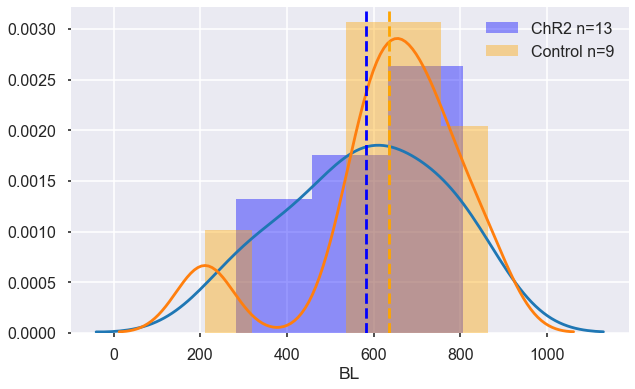

In [28]:
## Examine KDEs for BL
fig, ax = plt.subplots(figsize=(10,6))

group1 = {'name':'ChR2',
         'data':df_means.loc[grps['ChR2'],'BL'],
         'n':counts['ChR2']}
plot1 = {'hist_kws':dict(color='blue',lw=2, ls='-')}

group2 = {'name':'Control',
         'data':df_means.loc[grps['Control'],'BL'],
         'n':counts['Control']}
plot2 = {'hist_kws':dict(color='orange',lw=2, ls='-')}


label1= f"{group1['name']} n={group1['n']}"
sns.distplot(group1['data'], label=label1,
             ax=ax, hist_kws=plot1['hist_kws'])
# ax.legend()

label2= f"{group2['name']} n={group2['n']}"
sns.distplot(group2['data'], label=label2,
             ax=ax,hist_kws=plot2['hist_kws'])
ax.legend()

ax.axvline(group1['data'].mean(),color=plot1['hist_kws']['color'], ls='--')
ax.axvline(group2['data'].mean(),color=plot2['hist_kws']['color'], ls='--')


<BarContainer object of 1 artists>

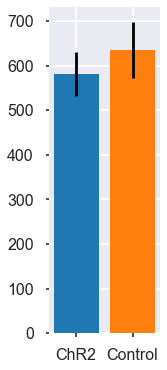

In [15]:
from scipy.stats import sem
fig, ax = plt.subplots(figsize=(2,6 ))
ax.bar(group1['name'],group1['data'].mean(),
      yerr=sem(group1['data']))

ax.bar(group2['name'],group2['data'].mean(),
      yerr=sem(group2['data']))

In [16]:

def Cohen_d(group1, group2):
    """
    Compute Cohen's d.
    
    Args:
        group1: Series or NumPy array
        group2: Series or NumPy array

    Returns:
        d (float): effect size statistic

    Interpretation:
    > Small effect = 0.2
    > Medium Effect = 0.5
    > Large Effect = 0.8
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [17]:
def test_assumptions(df_means,grps=None,
                     group_col='Group',
                     grp1='ChR2',
                     grp2='Control',
                     data_col='BL'):
    
    if grps is None:
        grps = df_means.groupby(group_col).groups
        
        
    group1 = {'name':grp1,
              'data':df_means.loc[grps[grp1],data_col]}
    
    group2 = {'name':grp2,
              'data':df_means.loc[grps[grp2],data_col]}
    
    results = [['Col','Test','Group(s)','Stat','p','p<.05']]
    
    ## Normality testing
    stat,p = stats.normaltest(group1['data'])
    results.append([data_col,'Normality',group1['name'],
                  stat, p, p<.05])
    
    stat,p = stats.normaltest(group2['data'])    
    results.append([data_col,'Normality',group2['name'],
                  stat, p, p<.05])
    ## Homo. of Variance Testing
    stat,p = stats.levene(group1['data'],group2['data'])
    results.append([data_col,'Equal Variance','Both',
                  stat, p, p<.05])
    
    ## Parametric T-Test
    stat,p = stats.ttest_ind(group1['data'],group2['data'])
    results.append([data_col,'T-Test 2samp','Both',stat,p,p<.05])
    
    ## Non-Parametric MWU
    stat,p = stats.mannwhitneyu(group1['data'],group2['data'])
    results.append([data_col,'Mann Whitney U','Both',stat,p,p<.05])
    
    ## Effect size with Cohen's d
    d = Cohen_d(group1['data'],group2['data'])
    results.append([data_col, "Cohen's d", 'Both','','',d])
    
    return pd.DataFrame(results[1:],columns=results[0])

test_assumptions(df_means)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))
//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


,Col,Test,Group(s),Stat,p,p<.05
0,BL,Normality,ChR2,0.79,0.674,False
1,BL,Normality,Control,8.25,0.0161,True
2,BL,Equal Variance,Both,0.131,0.721,False
3,BL,T-Test 2samp,Both,-0.68,0.505,False
4,BL,Mann Whitney U,Both,47,0.231,False
5,BL,Cohen's d,Both,,,-0.295


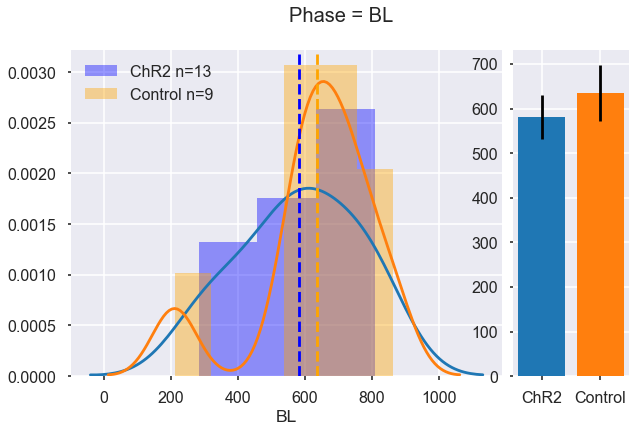

In [18]:
def plot_statplot(df_means,grps=None,
                  group_col='Group',data_col='BL'):
    
    if grps is None:
        grps = df_means.groupby(group_col).groups

    ## Examine KDEs for BL
    fig= plt.figure(figsize=(10,6))
    axes=['','']
    # Define gridspec to create grid coordinates             
    gs = fig.add_gridspec(nrows=1,ncols=9)
    axes[0] = fig.add_subplot(gs[0,0:7])
    axes[1] = fig.add_subplot(gs[0,7:])

    group1 = {'name':'ChR2',
             'data':df_means.loc[grps['ChR2'],data_col],
             'n':counts['ChR2']}
    plot1 = {'hist_kws':dict(color='blue',lw=2, ls='-')}

    group2 = {'name':'Control',
             'data':df_means.loc[grps['Control'],data_col],
             'n':counts['Control']}
    plot2 = {'hist_kws':dict(color='orange',lw=2, ls='-')}
    
    ax = axes[0]
    label1= f"{group1['name']} n={group1['n']}"
    sns.distplot(group1['data'], label=label1,
                 ax=ax, hist_kws=plot1['hist_kws'])
    # ax.legend()

    label2= f"{group2['name']} n={group2['n']}"
    sns.distplot(group2['data'], label=label2,
                 ax=ax,hist_kws=plot2['hist_kws'])
    ax.legend()

    

    ax.axvline(group1['data'].mean(),color=plot1['hist_kws']['color'], ls='--')
    ax.axvline(group2['data'].mean(),color=plot2['hist_kws']['color'], ls='--')


    ax = axes[1]

    ax.bar(group1['name'],group1['data'].mean(),
          yerr=sem(group1['data']))

    ax.bar(group2['name'],group2['data'].mean(),
          yerr=sem(group2['data']))
    
    plt.suptitle(f"Phase = {data_col}",fontsize=20)
    
    return fig

plot_statplot(df_means);

------------------------------------------------------------------------------------------


,Col,Test,Group(s),Stat,p,p<.05
0,BL,Normality,ChR2,0.79,0.674,False
1,BL,Normality,Control,8.25,0.0161,True
2,BL,Equal Variance,Both,0.131,0.721,False
3,BL,T-Test 2samp,Both,-0.68,0.505,False
4,BL,Mann Whitney U,Both,47,0.231,False
5,BL,Cohen's d,Both,,,-0.295


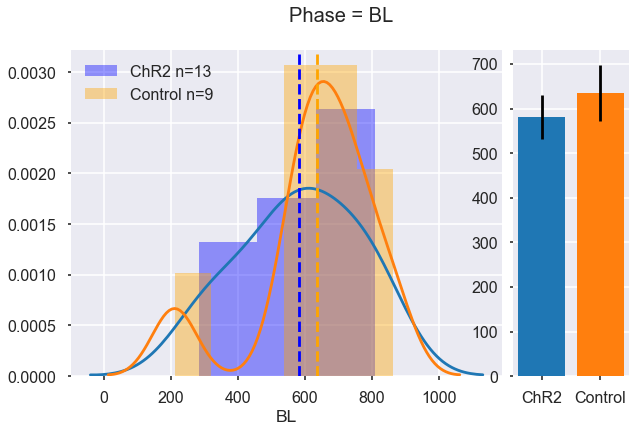

------------------------------------------------------------------------------------------


,Col,Test,Group(s),Stat,p,p<.05
0,S,Normality,ChR2,6.53,0.0381,True
1,S,Normality,Control,0.49,0.783,False
2,S,Equal Variance,Both,0.0723,0.791,False
3,S,T-Test 2samp,Both,0.252,0.804,False
4,S,Mann Whitney U,Both,51.5,0.332,False
5,S,Cohen's d,Both,,,0.109


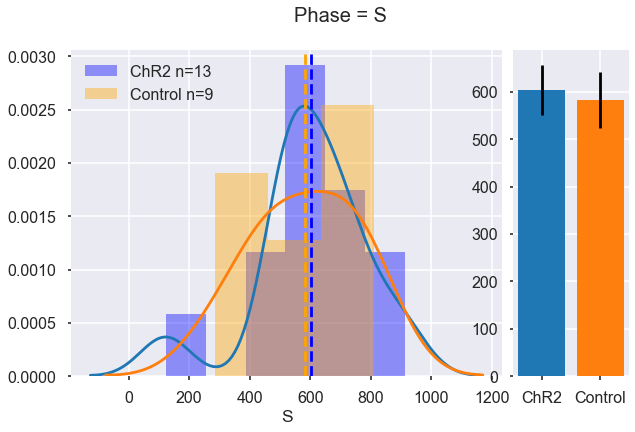

------------------------------------------------------------------------------------------


,Col,Test,Group(s),Stat,p,p<.05
0,PS,Normality,ChR2,3.78,0.151,False
1,PS,Normality,Control,2.28,0.321,False
2,PS,Equal Variance,Both,0.0517,0.822,False
3,PS,T-Test 2samp,Both,0.316,0.755,False
4,PS,Mann Whitney U,Both,55,0.421,False
5,PS,Cohen's d,Both,,,0.137


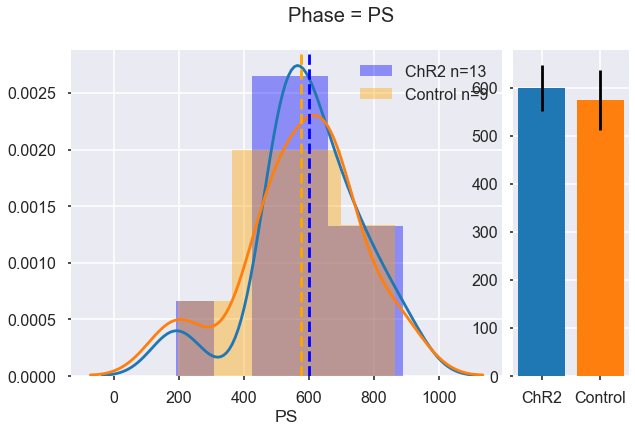

------------------------------------------------------------------------------------------


,Col,Test,Group(s),Stat,p,p<.05
0,R,Normality,ChR2,3.23,0.199,False
1,R,Normality,Control,7.01,0.0301,True
2,R,Equal Variance,Both,1.17,0.293,False
3,R,T-Test 2samp,Both,1.97,0.0632,False
4,R,Mann Whitney U,Both,24,0.0116,True
5,R,Cohen's d,Both,,,0.857


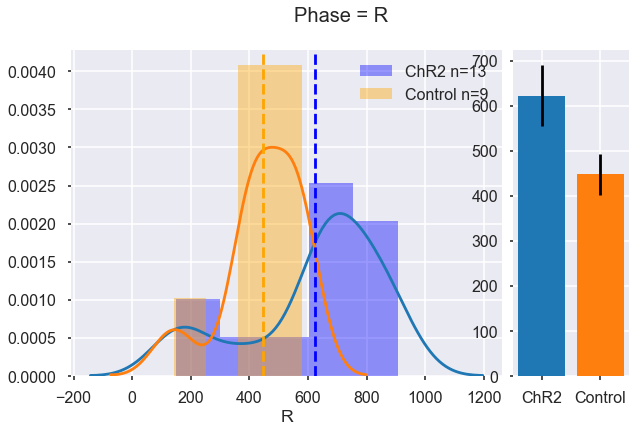

In [19]:
for phase in ['BL','S','PS','R']:
    print('---'*30)
    res = test_assumptions(df_means,data_col=phase)
    display(res)
    
    plot_statplot(df_means, data_col=phase)
#     print(stats.ttest_ind(group1['data'],group2['data'])
    plt.show()

,Mouse ID,Batch,Group,Sex,BL1,BL2,BL3,BL4,S1,S2,S3,S4,PS1,PS2,PS3,PS4,R1,R2,R3,R4,R5,R6,R7,R8
0,Con 4,1,Control,F,665,863,631,629,583,801,723,707,732,680,684,485,65,301,351,441,675,554,541,545
1,Con 5,1,Control,F,859,849,685,731,854,1103,645,633,733,662,605,623,128,268,462,569,988,728,933,564
2,Con 6,1,Control,F,589,507,635,902,699,743,761,949,872,952,828,806,129,311,669,666,516,579,913,736
3,CON 2.1,2,Control,M,939,909,850,756,807,617,526,736,743,625,690,759,281,357,386,585,565,550,806,732
4,ChR2 2.2,2,ChR2,F,710,505,494,596,620,589,676,537,779,537,581,515,477,659,737,606,713,682,709,759
5,ChR2 2.4,2,ChR2,F,564,808,589,596,591,580,419,463,707,625,547,595,532,951,901,851,807,858,802,803
6,DID CeA 3.1,3,ChR2,M,722,732,783,946,882,723,764,892,621,764,720,478,297,558,803,694,855,797,938,878
7,DID CeA 3.2,3,ChR2,M,497,649,586,506,546,493,456,601,437,462,704,498,10,44,86,284,212,133,141,274
8,DID CeA 3.3,3,ChR2,M,741,668,778,638,759,791,568,664,390,346,773,682,3,212,417,443,486,444,533,578
9,DID CeA 3.4,3,ChR2,M,953,988,579,706,1106,812,902,835,829,801,1011,919,274,559,840,890,724,793,559,700


## Conclusion:
- We had a significant p-val of .011, effect size was 0.8 (large)

- We reject the null hypothesis and support our alternative hypothesis that stimiulation of CeA-ChR2 neurons increased drinking. 